# Imports




**This notebook was completed in Google Colab**

In [ ]:
import numpy as np
import tensorflow as tf
import keras

#Preprocessing functions from keras
from keras.preprocessing.image import img_to_array, load_img

#Inception Resonant Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

#VGG19 model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg

# Shows that TensorFlow will be used in backend.
from IPython.core.display import display


**Upload Keras image classification files provided for the lesson**

---



# Constants

In [ ]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'


# Preprocessing Images
### It is necessary to convert images into an array of numbers before it can be used for the neural network

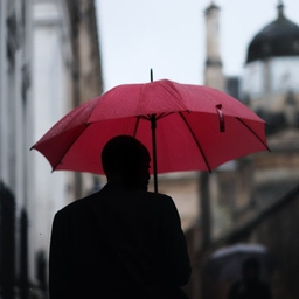

In [ ]:
pic = load_img(FILE_1, target_size=(299,299))
display(pic)

In [ ]:
pic_array = img_to_array(pic)
pic_array.shape
# Output = (Height, Width, Channels)

(299, 299, 3)

In [ ]:
# Expand array to be compatible for prediction
expanded = np.expand_dims(pic_array, axis = 0)
expanded.shape

(1, 299, 299, 3)

In [ ]:
# Process data to match expected format
preprocessed = preprocess_input(expanded)

# Load InceptionResNet

In [ ]:
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
%%time

# Downloads the weights file that was trained on ImageNet and applies it to the
# Resnet model
inception_model = InceptionResNetV2(weights='imagenet')



225209952/225209952 [==============================] - 9s 0us/step
CPU times: user 10.4 s, sys: 2.4 s, total: 12.8 s
Wall time: 19.9 s


In [ ]:
# Computations are organized into something called a graph
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions
https://keras.io/api/models/model_training_apis/

In [ ]:
# expanded shape of pic_array
  # expanded = np.expand_dims(pic_array, axis = 0)
  # expanded.shape
# change resolution of the image to be compatible with the model (299x299)
  # pic = load_img(FILE_1, target_size=(299,299))
  # display(pic)
# change format of data to better fit the model
  # preprocessed = preprocess_input(expanded)

prediction = inception_model.predict(preprocessed)

1/1 [==============================] - 1s 1s/step


In [ ]:
# from keras.applications.inception_resnet_v2 import decode_predictions
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.8298835),
  ('n03788195', 'mosque', 0.0012544562),
  ('n03792972', 'mountain_tent', 0.0012220609),
  ('n03220513', 'dome', 0.0011231123),
  ('n04479046', 'trench_coat', 0.0010624696)]]

**Challenge:** Create a function called ```format_img_inceptionresnet()``` that takes a filename as an argument. The function needs to load the image in the default resolution for InceptionResNetv2, convert the image into an array and return the preprocessed image for the InceptionResNetv2

In [ ]:
def format_img_inceptionresnet(filename):
  img = load_img(filename, target_size=(299,299))
  img_array = img_to_array(img)
  expanded_img = np.expand_dims(img_array, axis = 0)
  preprocessed_img = preprocess_input(expanded_img)
  return preprocessed_img

1/1 [==============================] - 1s 939ms/step


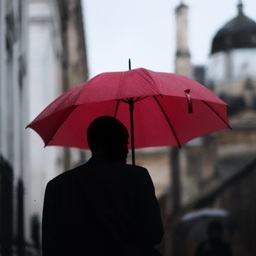

[[('n04507155', 'umbrella', 0.8298835),
  ('n03788195', 'mosque', 0.0012544562),
  ('n03792972', 'mountain_tent', 0.0012220609),
  ('n03220513', 'dome', 0.0011231123),
  ('n04479046', 'trench_coat', 0.0010624696)]]

In [ ]:
data = format_img_inceptionresnet(FILE_1)
prediction = inception_model.predict(data)
display(load_img(FILE_1))
decode_predictions(prediction)

# Testing the VGG19 Model
https://keras.io/api/applications/vgg/#vgg19-function

**Challenge:** Use the VGG19 Model from Keras with the ImageNet weights to make a prediction on several of the sample images. Load the model into the notebook. Process the data for VGG19. Then make a prediction. Look at the documentation for hints.

In [ ]:
def format_img_vgg19(filename):
  img = load_img(filename, target_size=(224,224))
  img_array = img_to_array(img)
  expanded_img = np.expand_dims(img_array, axis = 0)
  preprocessed_img =  preprocess_input_vgg19(expanded_img)
  return preprocessed_img

In [ ]:
vgg_model = VGG19(weights='imagenet')
# vgg_model.graph = tf.compat.v1.get_default_graph() # Not necessary

1/1 [==============================] - 2s 2s/step


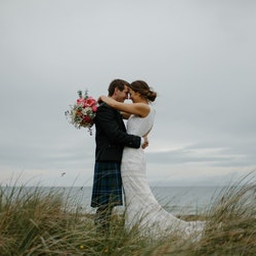

[[('n10148035', 'groom', 0.20221733),
  ('n02100735', 'English_setter', 0.046799388),
  ('n09399592', 'promontory', 0.03832199),
  ('n02102040', 'English_springer', 0.0366001),
  ('n03450230', 'gown', 0.032033056)]]

In [ ]:
data = format_img_vgg19(FILE_2)
prediction = vgg_model.predict(data)
display(load_img(FILE_2))
decode_vgg(prediction)